# Data preprocessing and Modeling


In this section, we first pre-process the data extracted from MIMIC-III database. We normalize the original data and oversample them because the prevalance of our positive samples is much lower than the prevalance of negative samples. And then, we build three machine learning models to analyze data and solve the problem. Finally, we show the evaluation of the performance of models.

In [8]:
# Load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
icu_features = pd.read_csv('diagnosis_ICU_features.csv')
lbe_features = pd.read_csv('labevents_features.csv')
prs_features = pd.read_csv('prescription_features.csv')
demog_features = pd.read_csv('demographics_features.csv')
lab_abnormal_features = pd.read_csv('lab_abnormal_features.csv')
uni_id_table = pd.read_csv('uni_id_1_yr_mortality_labels.csv')

In [9]:
#Merge them together 
one_yr_mor_dataset = pd.merge(uni_id_table, lbe_features, left_on=['SUBJECT_ID'], right_on=['SUBJECT_ID'], how = 'inner')
one_yr_mor_dataset = pd.merge(one_yr_mor_dataset, prs_features, left_on=['SUBJECT_ID'], right_on=['SUBJECT_ID'], how = 'inner')
one_yr_mor_dataset = pd.merge(one_yr_mor_dataset, icu_features, left_on=['SUBJECT_ID'], right_on=['SUBJECT_ID'], how = 'inner')
one_yr_mor_dataset = pd.merge(one_yr_mor_dataset, demog_features, left_on=['SUBJECT_ID'], right_on=['SUBJECT_ID'], how = 'inner')
one_yr_mor_dataset = pd.merge(one_yr_mor_dataset, lab_abnormal_features, left_on=['SUBJECT_ID'], right_on=['SUBJECT_ID'], how = 'inner')
one_yr_mor_dataset.head()

,Unnamed: 0_x,SUBJECT_ID,1-yr-mortality,Unnamed: 0_y,units_max,units_min,units_mean,mEq/L_max,mEq/L_min,mEq/L_mean,...,EU/dL,,#/hpf,#/lpf,ng/mL,ng/ml,sec,SECONDS,Ratio,#/uL
0,0,22,0,0,7.47,6.50,6.985000,142.0,0.0,50.066667,...,0.0,0.0,0.000000,0.0,0.000,0.0,0.000000,0.0,0.0,0.0
1,1,23,0,1,7.46,6.00,7.261765,144.0,-4.0,43.052727,...,0.0,0.5,0.000000,0.0,0.000,0.0,0.250000,0.0,0.0,0.0
2,2,24,0,2,7.42,7.42,7.420000,141.0,0.0,53.586364,...,0.0,0.0,0.000000,0.0,0.500,0.0,0.000000,0.0,0.0,0.0
3,3,25,0,3,7.39,6.50,7.236667,139.0,-2.0,42.709375,...,0.0,0.0,0.000000,0.0,0.625,1.0,0.375000,0.0,0.0,0.0
4,4,26,0,4,5.00,5.00,5.000000,143.0,3.7,54.223810,...,0.5,0.0,0.333333,1.0,0.000,0.0,0.454545,0.0,0.0,0.0


In [16]:
# delete redundant column
for ec in one_yr_mor_dataset.columns:
    if 'Unnamed' in ec:
        del one_yr_mor_dataset[ec]
one_yr_mor_dataset.head()

,SUBJECT_ID,1-yr-mortality,units_max,units_min,units_mean,mEq/L_max,mEq/L_min,mEq/L_mean,mmol/L_max,mmol/L_min,...,EU/dL,,#/hpf,#/lpf,ng/mL,ng/ml,sec,SECONDS,Ratio,#/uL
0,22,0,7.47,6.50,6.985000,142.0,0.0,50.066667,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000,0.0,0.000000,0.0,0.0,0.0
1,23,0,7.46,6.00,7.261765,144.0,-4.0,43.052727,4.6,1.0,...,0.0,0.5,0.000000,0.0,0.000,0.0,0.250000,0.0,0.0,0.0
2,24,0,7.42,7.42,7.420000,141.0,0.0,53.586364,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.500,0.0,0.000000,0.0,0.0,0.0
3,25,0,7.39,6.50,7.236667,139.0,-2.0,42.709375,1.8,1.0,...,0.0,0.0,0.000000,0.0,0.625,1.0,0.375000,0.0,0.0,0.0
4,26,0,5.00,5.00,5.000000,143.0,3.7,54.223810,0.0,0.0,...,0.5,0.0,0.333333,1.0,0.000,0.0,0.454545,0.0,0.0,0.0


## Normalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

Reference: Why Data Normalization is necessary for Machine Learning models? https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

Normalization has two merits:
- > Eliminate the effect of outliers
- > Increase convergence rate of gradient descent



In [17]:
one_yr_mor_dataset_normalized = one_yr_mor_dataset.copy(deep=True) # back_up
for each_col in one_yr_mor_dataset_normalized.columns[2:]:
    this_col = one_yr_mor_dataset_normalized[each_col].values
    one_yr_mor_dataset_normalized[each_col] = (this_col-this_col.min())/(this_col.max()+1e-5)
one_yr_mor_dataset_normalized.head()

,SUBJECT_ID,1-yr-mortality,units_max,units_min,units_mean,mEq/L_max,mEq/L_min,mEq/L_mean,mmol/L_max,mmol/L_min,...,EU/dL,,#/hpf,#/lpf,ng/mL,ng/ml,sec,SECONDS,Ratio,#/uL
0,22,0,0.071143,0.2600,0.150215,0.106607,55.810735,0.644716,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0
1,23,0,0.071048,0.2400,0.156167,0.108108,55.270196,0.561117,0.042593,0.055866,...,0.00000,0.499995,0.00000,0.00000,0.000000,0.00000,0.249998,0.0,0.0,0.0
2,24,0,0.070667,0.2968,0.159570,0.105856,55.810735,0.686667,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.499995,0.00000,0.000000,0.0,0.0,0.0
3,25,0,0.070381,0.2600,0.155627,0.104354,55.540465,0.557025,0.016667,0.055866,...,0.00000,0.000000,0.00000,0.00000,0.624994,0.99999,0.374996,0.0,0.0,0.0
4,26,0,0.047619,0.2000,0.107527,0.107357,56.310735,0.694265,0.000000,0.000000,...,0.99998,0.000000,0.33333,0.99999,0.000000,0.00000,0.454541,0.0,0.0,0.0


## Training and testing dataset split

In [22]:
# Training
np.random.seed(1)
x, y = one_yr_mor_dataset_normalized[one_yr_mor_dataset_normalized.columns[2:]].values, np.expand_dims(one_yr_mor_dataset_normalized[one_yr_mor_dataset_normalized.columns[1]].values, axis=1)
np.random.shuffle(x)
np.random.shuffle(y)
train_ratio = 0.7
train_x, train_y, test_x, test_y = x[:int(train_ratio*x.shape[0]), :], y[:int(train_ratio*x.shape[0])], x[int(train_ratio*x.shape[0]):, :], y[int(train_ratio*x.shape[0]):]


## Oversampling by SMOTE

We notice that the prevalance of our positive samples is much lower than the prevalance of negative samples. Thus, we choose SMOTE to balance the dataset.

The most common technique to oversample dataset is known as SMOTE: Synthetic Minority Over-sampling Technique. To illustrate how this technique works consider some training data which has s samples, and f features in the feature space of the data. Note that these features, for simplicity, are continuous. As an example, consider a dataset of birds for classification. The feature space for the minority class for which we want to oversample could be beak length, wingspan, and weight (all continuous). To then oversample, take a sample from the dataset, and consider its k nearest neighbors (in feature space). To create a synthetic data point, take the vector between one of those k neighbors, and the current data point. Multiply this vector by a random number x which lies between 0, and 1. Add this to the current data point to create the new, synthetic data point.

Reference: Oversampling and undersampling in data analysis, Wikipedia. https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis 

In [18]:
print("Prevalence: ", np.sum(one_yr_mor_dataset_normalized['1_yr_mortality'].values)/len(one_yr_mor_dataset_normalized['1_yr_mortality'].values))

Prevalence:  0.27373890767980874


In [23]:
# Synthetic Minority Over-sampling Technique
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(train_x, train_y)

d:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Machine Learning Model

In our experiment, we choose three typical machine learning models, which are Logistic Regression, Random Forest and Fully-connected Neural Network.

- > Logistic Regression 
    - > Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. Reference: What is Logistic Regression? https://www.statisticssolutions.com/what-is-logistic-regression/
- > Random Forest 
    - > Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Reference: https://en.wikipedia.org/wiki/Random_forest
- > Artificial neural networks 
    - > Artificial neural networks (ANN) or connectionist systems are computing systems vaguely inspired by the biological neural networks that constitute animal brains.The neural network itself is not an algorithm, but rather a framework for many different machine learning algorithms to work together and process complex data inputs. Such systems "learn" to perform tasks by considering examples, generally without being programmed with any task-specific rules. Reference: https://en.wikipedia.org/wiki/Artificial_neural_network
    
In this section, we compare the performance of three models on this task

## Cross-validation

First, we use cross-validation to tune hyper-parameters of models.

In machine learning, two tasks are commonly done at the same time in data pipelines: cross validation and (hyper)parameter tuning. Cross validation is the process of training learners using one set of data and testing it using a different set. Parameter tuning is the process to selecting the values for a model’s parameters that maximize the accuracy of the model.

Reference: Cross Validation With Parameter Tuning Using Grid Search. https://chrisalbon.com/machine_learning/model_evaluation/cross_validation_parameter_tuning_grid_search/

Due to the limitation of time, we do not re-run cross-validation in this script.

In [ ]:
from sklearn.model_selection import GridSearchCV
LR_parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100]}
LR_model_CV = LogisticRegression()
LR_model_CV = GridSearchCV(LR_model_CV, parameters, cv=5)
LR_model_CV.fit(n_x, n_y)
LR_model_CV.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
RF_parameters  = { 
    'n_estimators': [50, 100],
    'max_depth' : [15, 20, 25],
    'criterion' :['gini', 'entropy']
}
RF_model_CV = RandomForestClassifier()
RF_model_CV = GridSearchCV(RF_model_CV, RF_parameters, cv=5)
RF_model_CV.fit(n_x, n_y)
RF_model_CV.best_params_

In [ ]:
#NN 5-fold cross-validation
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

NN_parameters = {'batch_size': [128, 256], 'learning_rate': [1e-3, 2e-3, 1e-2], 'epoch': [20, 50, 100]}
best_parameters = {'batch_size': [], 'learning_rate': []}
best_acc = 0
scores = []
for e_bs in NN_parameters['batch_size']:
    for e_lr in NN_parameters['learning_rate']:
        for train, test in kfold.split(x, y):
            #create model
            model = Sequential()
            #get number of columns in training data
            n_cols = train_x.shape[1]
            #add model layers
            model.add(Dense(200, activation=None, input_shape=(n_cols,)))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Dense(200, activation=None))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Dense(32, activation=None))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])
            model.fit(x[train], y[train], batch_size=256, validation_split=0.05, epochs=20,shuffle=True)
            scores.append(model.evaluate(x[test], y[test])[1])
        scores = np.sum(scores)
        if scores > best_acc:
            best_parameters['batch_size'] = e_bs
            best_parameters['learning_rate'] = e_lr
            best_acc = scores/5
        scores = []
print("The best parameters we find: ")
print(best_parameters)

## Training

In [ ]:
# Logistic Regression without oversampling
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C = LR_model_CV.best_params_['C'], penalty='l1').fit(train_x, train_y)
LR_model.score(test_x, test_y)

In [ ]:
# Logistic Regression with oversampling
LR_model = LogisticRegression(C = LR_model_CV.best_params_['C'], penalty='l1').fit(oversampled_trainX, oversampled_trainY)
LR_model.score(test_x, test_y)

In [ ]:
# Random Forest without oversampling
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators= 50, max_depth=25,criterion='gini',random_state = 1).fit(train_x, train_y)
RF_model.score(test_x, test_y)

In [ ]:
# Random Forest with oversampling
RF_model = RandomForestClassifier(n_estimators= 50, max_depth=25,criterion='gini',random_state = 1).fit(oversampled_trainX, oversampled_trainY)
RF_model.score(test_x, test_y)

In [ ]:
from keras.callbacks import Callback, ModelCheckpoint
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))


class ValaccHistory(Callback):
    def on_train_begin(self, logs={}):
        self.val_acc = []

    def on_batch_end(self, batch, logs={}):
        self.val_acc.append(logs.get('acc'))
        
loss_history = LossHistory()
val_acc_history = ValaccHistory()

# ANN without oversampling
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_x.shape[1]

#add model layers
model.add(Dense(200, activation=None, input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(200, activation=None))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, activation=None))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.002),
              metrics=['accuracy'])

model.fit(x, y, batch_size=256, validation_split=0.05, epochs=50,shuffle=True, callbacks=[loss_history, val_acc_history])
model.save_weights('ds_model_no_oversampled_normalized_data_1_05022019.h5')

In [ ]:
# ANN with oversampling
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_x.shape[1]

#add model layers
model.add(Dense(200, activation=None, input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(200, activation=None))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, activation=None))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.002),
              metrics=['accuracy'])

model.fit(oversampled_trainX, oversampled_trainY, batch_size=256, validation_split=0.05, epochs=50,shuffle=True, callbacks=[loss_history, val_acc_history])
model.save_weights('ds_model_oversampled_normalized_data_1_05022019.h5')

## Evaluating results

We use precision, recall, f1-score, accuracy and AUC to evaluate the performance of our models.One can see details from the website shown below: Interpreting ROC Curves, Precision-Recall Curves, and AUCs. https://www.datascienceblog.net/post/machine-learning/interpreting-roc-curves-auc/

Due to the limitation of time, we just how the expected results of the codes.

In [ ]:
def multi_model_ROC_curve(predicition, groundtruth, model_name):
    step = 1000
    t_array = np.linspace(0, 1, step)
    for idx, each_m in enumerate(model_name):
        sensitivity1 = np.array([confusion_matrix_threshold(predicition[idx], groundtruth, t)[0, 0]/np.sum(groundtruth==1) for t in t_array])
        specificity1 = np.array([confusion_matrix_threshold(predicition[idx], groundtruth, t)[1, 1]/np.sum(groundtruth==0) for t in t_array])
        pred = predicition[idx]
        label = groundtruth
        fpr, tpr, thresholds = metrics.roc_curve(label, pred, pos_label=1)
        AUC = metrics.auc(fpr, tpr)
        print('Result of ', each_m)
        print('AUC: ', AUC)
        plt.plot(1 - specificity1, sensitivity1, label='{}'.format(each_m))
    plt.plot([1, 0],[1, 0], linestyle = "--", label='ROC of a random classifier')
    plt.title('Recevier Operating Characteristic for output')
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.legend()
    plt.show()

multi_model_ROC_curve([NN_predictions.transpose()[0], 
                       LR_model.predict_proba(test_x)[:, 1], 
                       RF_model.predict_proba(test_x)[:, 1]],
                       nnn_test_y.transpose()[0], ['ANN', 'Logsitic Regression', 'Random Forest'])

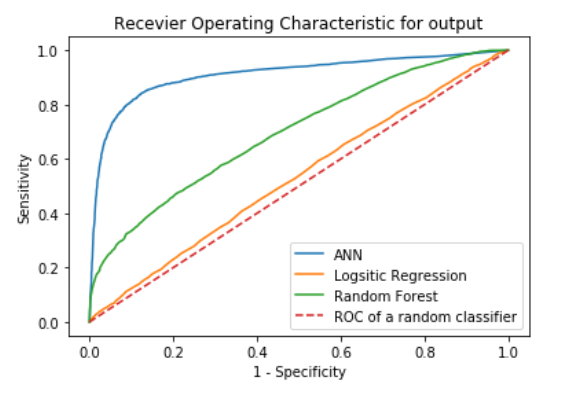

In [2]:
from IPython.display import Image
Image(filename='ROC_curve.png') 

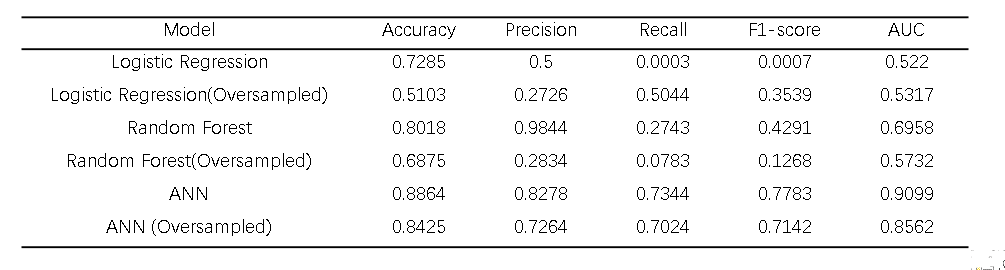

In [40]:
from IPython.display import Image
Image(filename='Performance_table.png') 

## Summary

From the result, we know that oversampling will harm the performance of Random Forest model and ANN model, but it will improve the general performance of Logistic Regression model.

Obviously, ANN perform best on the one-year mortality prediction task.